<a href="https://colab.research.google.com/github/UBC-Astrophysics/QEDSurface/blob/master/magnetar.py/Double_Blackbody.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the entire repository

In [1]:
# Get the entire archive (maybe you already have it)
! git clone https://github.com/UBC-Astrophysics/QEDSurface.git

Cloning into 'QEDSurface'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 1757 (delta 64), reused 13 (delta 6), pack-reused 1661
Receiving objects: 100% (1757/1757), 78.18 MiB | 11.41 MiB/s, done.
Resolving deltas: 100% (722/722), done.
Checking out files: 100% (1618/1618), done.


In [2]:
# change the directory if you have to
import os
os.chdir('QEDSurface/magnetar.py')


In [3]:
# update just in case
! git pull

Already up to date.


# Load Libraries

In [1]:
#import numba
import numpy as np
from Magnetar import pfield, pfield_array, surface_model
import matplotlib.pyplot as plt


# Load the double black-body surface map

In [2]:
import glob
allsurface=surface_model().loaddata(glob.glob('Sample_Atmospheres/doubleBB_h/*.int'))
aa=allsurface.mcolat
# copy the front surface to the back of the star
# add the angles
allsurface.mcolat=aa+[180-i for i in aa[::-1]]
# add the patches
allsurface.patches=allsurface.patches+allsurface.patches[::-1]

# Work with a single orientation

## Load the propagation file (pfield)

In [3]:
pfield_test=pfield().loaddata('Sample_Pfields/pfield_models_QED/pfield_5keV_30deg')


## Calculate intensities across the image

In [4]:
# Calculate the intensity across the surface at 1.65426 keV as observed
pfield_test.recalculate(1.65426,allsurface,gtt=(1-2*2.0/10.0)**0.5)

(1093.828016529843, -1073.7088231657501)

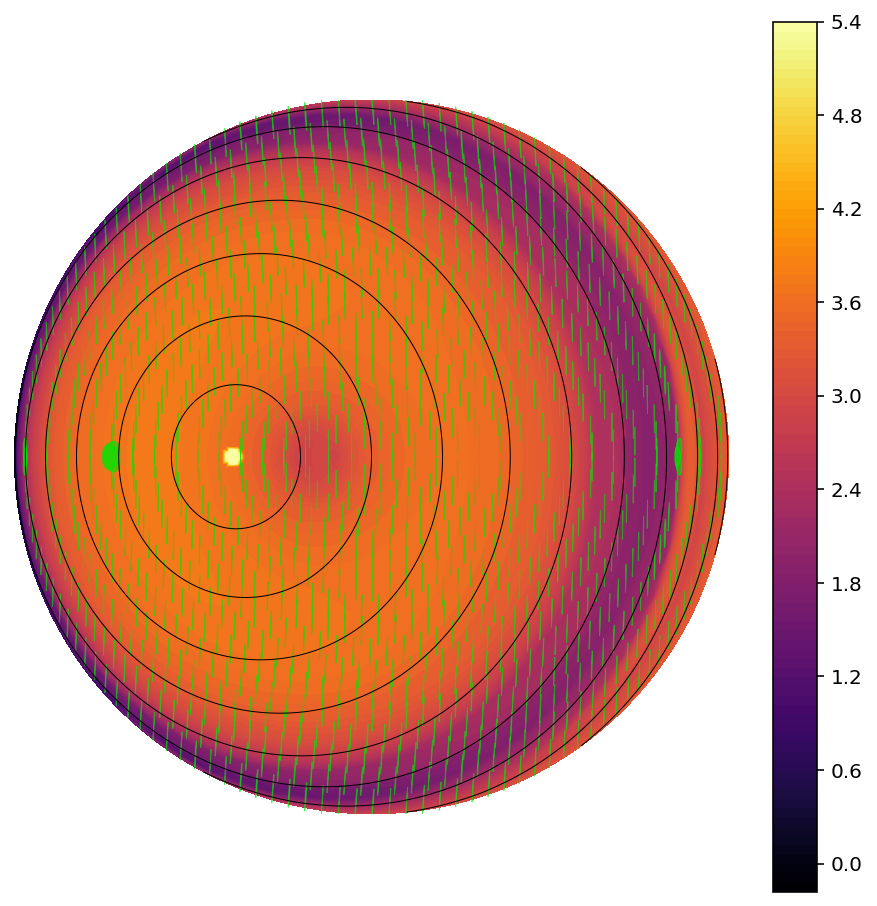

In [5]:
pfield_test

In [8]:
print(allsurface.mcolat)
# print(pfield_test.qmean/pfield_test.imean)

[0.0, 1.6, 2.0, 9.0, 18.195, 31.788, 41.41, 49.458, 56.633, 63.256, 69.513, 75.522, 81.373, 98.627, 104.478, 110.487, 116.744, 123.36699999999999, 130.542, 138.59, 148.212, 161.805, 171.0, 178.0, 178.4, 180.0]


In [9]:
# calculate the mean intensity over the surface for a range of photon energies
pfield_test.calcvalues(allsurface,gtt=(1-2*2.0/10.0)**0.5)


## Print the data arrays

In [10]:
print(pfield_test)

#   Phi[rad]  Energy[keV]            I          Q/I
    0.523599     0.316228      624.194    -0.958252
    0.523599     0.331285       616.02    -0.956729
    0.523599      0.34706      605.914    -0.955139
    0.523599     0.363585      594.458       -0.953
    0.523599     0.380897      576.433    -0.948342
    0.523599     0.399034      558.949    -0.959452
    0.523599     0.418034      531.609    -0.969812
    0.523599      0.43794       514.88     -0.96453
    0.523599     0.458792      492.826    -0.961902
    0.523599     0.480638      482.325    -0.960166
    0.523599     0.503524      474.285     -0.95878
    0.523599       0.5275      473.477    -0.957615
    0.523599     0.552617      492.981    -0.957833
    0.523599      0.57893      521.704     -0.95862
    0.523599     0.606496      582.597    -0.962401
    0.523599     0.635375      650.796    -0.965996
    0.523599     0.665629      727.761    -0.968777
    0.523599     0.697324      795.999    -0.971144
    0.523599

## Let's do some plots

In [11]:
# load a datafile
datae,dataf=np.loadtxt('4U_0142+614.dat',unpack=True,usecols=(0,1))

In [12]:
# get the mean intensities and energy bins for the orientation
ee=pfield_test.ebins
ivec=pfield_test.iint
qvec=pfield_test.qint
# load a file with the interstellar absorption model
eabs,sabs=np.loadtxt('tbabs.dat',unpack=True)
sabs=sabs
ii=np.argsort(eabs)
eabs=eabs[ii]
sabs=sabs[ii]
# absorption cross-section per hydrogen atom in units of 1e-24 cm^2 for our energy bins
ssabs=np.interp(ee,eabs,sabs)/(ee)**3*1e-24
# the best-fit hydrogen column is 0.52e22 /cm2
totabs=np.exp(-0.6e22*ssabs)

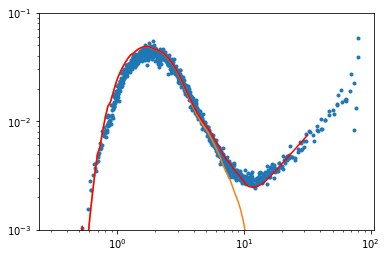

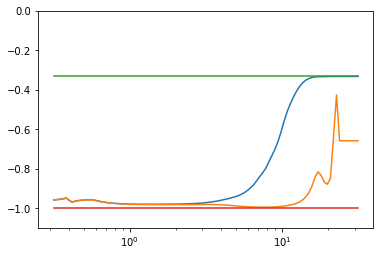

In [13]:
# plot the model against the data
norm=1.7e4
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*ivec/norm)
plt.loglog(ee,totabs*(ivec/norm+ee**1.3/1.2e4),'r')
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec/norm)/(ivec/norm+ee**1.3/1.2e4))
plt.plot(ee,qvec/ivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.ylim(-1.1,0)
plt.show()

# Work with all orientations

## Load the orientation files

In [14]:
pfieldarray_test=pfield_array().loaddata(glob.glob('Sample_Pfields/pfield_models_QED/*'))

## Calculate the mean intensities for all orientations and energies

In [15]:
pfieldarray_test.calcvalues(allsurface,gtt=(1-2*2.0/10.0)**0.5)

In [16]:
print(pfieldarray_test)

#   Phi[rad]  Energy[keV]            I          Q/I
           0     0.316228      1321.13  9.28631e-09
           0     0.331285      1352.91   9.3204e-09
           0      0.34706       1376.7  9.36517e-09
           0     0.363585      1392.21    9.414e-09
           0     0.380897      1400.47  9.46171e-09
           0     0.399034      1394.74  9.53217e-09
           0     0.418034      1380.48     9.56e-09
           0      0.43794      1360.64  9.54558e-09
           0     0.458792      1334.66  9.47988e-09
           0     0.480638      1298.38  9.44674e-09
           0     0.503524      1255.93  9.44123e-09
           0       0.5275      1197.29  9.50075e-09
           0     0.552617      1147.04  9.53194e-09
           0      0.57893       1090.1  9.73795e-09
           0     0.606496      1066.01  9.83932e-09
           0     0.635375      1015.71  9.70291e-09
           0     0.665629      1023.28  9.19678e-09
           0     0.697324      1008.78  8.56029e-09
           0

## Plot the mean intensity over the orientations

In [17]:
ivec=[pf.iint  for pf in pfieldarray_test.pfi]
qvec=[pf.qint  for pf in pfieldarray_test.pfi]
ee=pfieldarray_test.pfi[0].ebins

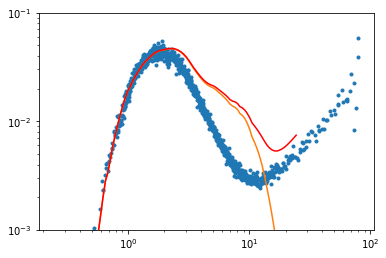

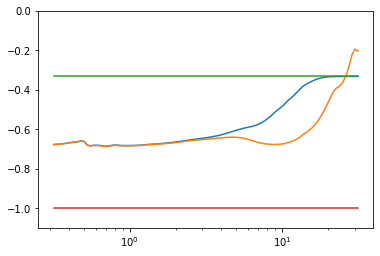

In [18]:
totivec = (ivec[0]+ivec[1]+ivec[2]+ivec[3]+ivec[4]+ivec[5]+ivec[6])/7
totqvec = (qvec[0]+qvec[1]+qvec[2]+qvec[3]+qvec[4]+qvec[5]+qvec[6])/7
plt.loglog(datae,dataf,'.')
plt.loglog(ee*(1-2*2.0/10.0)**0.5,totabs*totivec*ee/10e4)
plt.loglog(ee*(1-2*2.0/10.0)**0.5,totabs*(totivec*ee/10e4+ee**1.3/1.2e4),'r')
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+totqvec/10e4)/(totivec/10e4+ee**1.3/1.2e4))
plt.plot(ee,totqvec/totivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.ylim(-1.1,0)
plt.show()

## Plot the intensity for several orientations

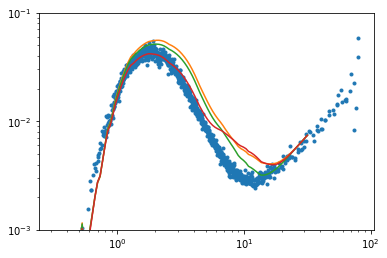

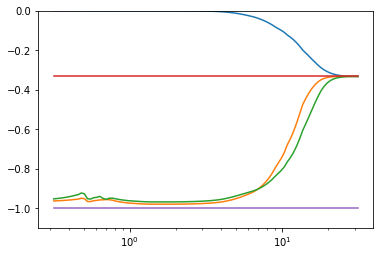

In [19]:
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*(ivec[0]/4e4+ee**1.3/1.2e4))
plt.loglog(ee,totabs*(ivec[3]/4e4+ee**1.3/1.2e4))
plt.loglog(ee,totabs*(ivec[6]/4e4+ee**1.3/1.2e4))
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[0]/4e4)/(ivec[0]/4e4+ee**1.3/1.2e4))
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[3]/4e4)/(ivec[3]/4e4+ee**1.3/1.2e4))
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[6]/4e4)/(ivec[6]/4e4+ee**1.3/1.2e4))
#plt.plot(ee,totqvec/totivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.ylim(-1.1,0.0)
plt.show()

# Experiment with QED-on and QED-off

## Load a QED-off propagation model

In [20]:
pf30=pfield().loaddata('Sample_Pfields/pfield_models_noQED/pfield_noQED_30')
pf30.recalculate(5,allsurface)

(542.150295008111, -222.03240175196683)

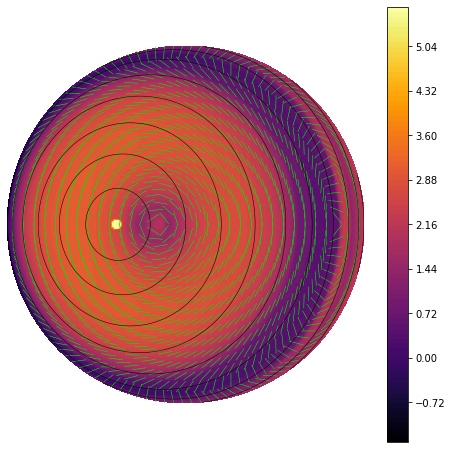

In [21]:
q=pf30.plot(datamap=np.log10(pf30.data['X']+pf30.data['O']),cmap='inferno',ellipsecolor=[0,0.9,0])
q.savefig('HS30NoQED.pdf',bbox_inches='tight')

## Load a QED-on propagation model

In [22]:
pf30Q=pfield().loaddata('Sample_Pfields/pfield_models_QED/pfield_5keV_30deg')
pf30Q.recalculate(5,allsurface)


(542.1323227281072, -532.4106949979113)

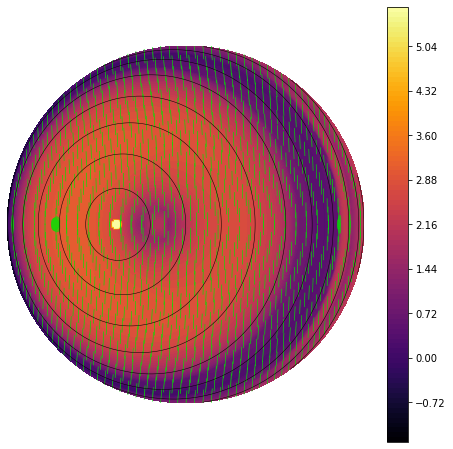

In [23]:
q=pf30Q.plot(datamap=np.log10(pf30Q.data['X']+pf30Q.data['O']),cmap='inferno',ellipsecolor=[0,0.9,0])
q.savefig('HS30.pdf',bbox_inches='tight')